In [1]:
import numpy as np
import matplotlib.pyplot as plt
import chapter1 as ut

# Introducción a las Redes Neuronales

En esta sección se describiran los componentes básicos de las redes neuronales.

# Esenciales
Cuando trabajamos con redes neuronales, hay que tener presente algunos terminos que seran constantes a lo largo de todos los proyectos. Una lista de ellos es la siguiente:

- Función de activación.
- Feed Fordward.
- Función de perdida.
- Propagación inversa.
- Base de datos

# Algebra

## Vectores y Matrices

Un vector se puede definir como "un elemento de un espacio vectorial" en matemáticas, o como "una magnitud física definida en un sistema de referencia que se caracteriza por tener un módulo (o longitud), dirección, y orientación" en física.

\begin{align}
b = 
\begin{bmatrix}
b_{0}\\b_{1}\\b_{2}\\
\end{bmatrix}
\end{align}

Una matriz, es un arreglo de números.

\begin{align}
W =
\begin{bmatrix}
W_{0,0} & W_{0,1} & W_{0,2}\\
W_{1,0} & W_{1,1} & W_{1,2}\\
W_{2,0} & W_{2,1} & W_{2,2}
\end{bmatrix}
\end{align}

## Multiplicacion por un Escalar

La multiplicación por un escalar es una operación que afecta por igual a cada elemento de la matriz o vector.

Con un vector sucede de la siguiente manera:

\begin{align}
3*b = 
\begin{bmatrix}
3*b_{0}\\
3*b_{1}\\
3*b_{2}
\end{bmatrix}
\end{align}

Lo mismo aplica para una matriz:

\begin{align}
3*W =
\begin{bmatrix}
3*W_{0,0} & 3*W_{0,1} & 3*W_{0,2}\\
3*W_{1,0} & 3*W_{1,1} & 3*W_{1,2}\\
3*W_{2,0} & 3*W_{2,1} & 3*W_{2,2}
\end{bmatrix}
\end{align}

## Multiplicación Matriz-Vector/Matriz-Matriz

Cuando nos enfrentamos a este caso, debemos asegurarnos que los dos elementos sean compatibles. Como se ha apreciado con anterioridad, $b$ tiene una forma de $3x1$ y $W$ de $3x3$, por lo que es importante prestar atención el orden en que estos son multiplicados. La regla general es que dado un elemento $A_{mxn}$ y otro $B_{nxo}$, $A*B$ podrá realizarse siempre y cuando $A$ tenga $n$ columnas y $B$ $n$ hileras, y el elemento resultante tendrá una forma $mxo$.

\begin{align}
W_{3x3}*b_{3x1} = S_{3x1} =
\begin{bmatrix}
W_{0,0}*b_{0} + W_{0,1}*b_{1} + W_{0,2}*b_{2}\\
W_{1,0}*b_{0} + W_{1,1}*b_{1} + W_{1,2}*b_{2}\\
W_{2,0}*b_{0} + W_{2,1}*b_{1} + W_{2,2}*b_{2}
\end{bmatrix}
 =
\begin{bmatrix}
S_{0}\\ S_{1}\\ S_{2}
\end{bmatrix}
\end{align}

Si intentamos realizar la operación con el orden de los elementos alterado, simplemente no se puede.
\begin{align}
b_{3x1}*W_{3x3} = \text{No se puede}
\end{align}

# Estructura Básica

## Neurona Artificial

Las neuronas estan compuestas por tres elementos: sus entradas $x_i$, su salida $y$, una función $f(x)$ que modifica a las entradas.

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQORTSLDLNRgGC8SamXvQuhtWQe0nKawkuX8SUKrs9ORJUnIlXcCBfSWuF2EFZXrPqwR1c91-g0Pifo/pub?w=453&h=242">

La entrada es un vector, y la salida es un número real, mientras que la función intermedia está definida como:

\begin{align}
f(x) = \sigma (WX + b)
\end{align}

y sus partes son:
- W: Pesos (weights) o el kernel. Puede ser una matriz/vector.
- X: Entradas a la neurona. Es un vector
- b: Bias.
- $\sigma$: Función de activación.

Los pesos y los biases son los responsables de almacenar las características que serán aprendidas por nuestra red. Las funciones de activación nos permiten incorporar comportamientos no lineales a las operaciones; al igual que con los pesos y biases, sin esto nuestra red no tendría la capacidad de resolver problemas complejos. ** Mostrar como se puede separar puntos en un plano 2D con lineas, y sin lineas, en el espacio 3D

# Ejemplo: Función Lineal

Supongamos que tenemos un arreglo de numeros que van del 0 al 10 y queremos tener una forma de convertirlos al doble de su valor. A simple vista podemos asumir que lo unico que hace falta es tener una función $f(x) = 2x$ para lograr nuestro cometido. ¿Pero que pasa si queremos utilizar redes neuronales artificiales? En ese caso, requerimos solo de una neurona con una entrada y una salida.

In [178]:
# Entradas
X = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])

# Valores esperados
Y = np.array([[0],[2],[4],[6],[8],[10],[12],[14],[16],[18],[20]])

# Pesos
W = np.array([[2]])

# Biases
b = np.array([0])

# Red neuronal
s = np.dot(X,W) + b

print(s)

[[ 0]
 [ 2]
 [ 4]
 [ 6]
 [ 8]
 [10]
 [12]
 [14]
 [16]
 [18]
 [20]]


## Perceptron

Ahora vayamos con el perceptron. Lo que caracteriza a este tipo de neurona es su función de activación, que es una función escalón. Esto quiere decir que si el valor resultante de $\sigma (WX + b)$ es menor que cero, el valor de $y$ se deja en $0$. De forma contraria, si $ \sigma (WX + b)$ es mayor o igual a cero, el valor de $y$ se establece a $1$.

\begin{align*}
\text{Función Escalón}\\
\sigma(s) = \biggl\{
\begin{matrix}
0 & if 0>x\\
1 & if x\geq 0
\end{matrix}
\end{align*}

### Ejemplo

Dada la operación AND, determinar el perceptrón genere un área de desición acorde a su tabla de verdad.

| $x_0$ | $x_1$ | $y$ |
|---------------------|
|   1   |   1   |  1  |
|   1   |   0   |  0  |
|   0   |   1   |  0  |
|   0   |   0   |  0  |

Visto de otra forma, la tabla de verdad se puede ver en una plano cartesiano como se muestra a continuación.

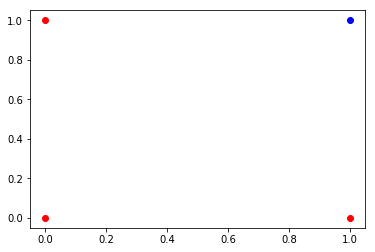

In [3]:
ut.plot_AND()

Ahora ¿Cual es la estructura para resolver este problema? 

Esta tarea en particular requiere solo una neurona, como podemos apreciar es un problema que se puede resolver con una función lineal. Ya que tenemos dos entradas y una salida (si es cero o uno), los pesos $W$ tendrán la forma $2x1$, y $b$ simplemente tendrá un valor.

En otras palabras, la función que debemos encontrar en una como la siguiente:

\begin{align}
y = \sigma (X_0 * W_0 + X_1 * W_1 + b_0)
\end{align}

Valores de entrada:
 [[1 1]
 [1 0]
 [0 1]
 [0 0]]
 Pesos:
 [[0.5]
 [0.1]]
 Bias:
 [[0]]

[[0.64565631]
 [0.62245933]
 [0.52497919]
 [0.5       ]]
Predicciones:
 [[1]
 [1]
 [1]
 [0]]


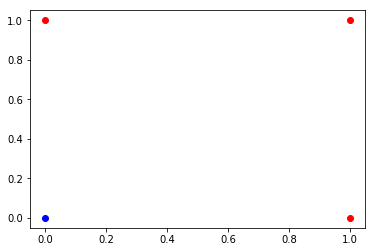

In [200]:
# Definimos nuestras entradas
X = np.array([[1,1],
              [1,0],
              [0,1],
              [0,0]])

# 0.2 and 0.2
W = np.array([[0.5],[0.1]])

# -0.2
b = np.array([[0]])

# Definimos los valores de salida que deseamos
Y = np.array([[1],
              [0],
              [0],
              [0]])




print('Valores de entrada:\n {}\n Pesos:\n {}\n Bias:\n {}\n'.format(X,W,b))

# Predecimos los valores de nuestra red
s = np.dot(X,W) + b
y_pred = ut.sigmoid(s)
print(y_pred)
y_pred = (y_pred>0.5).astype(np.int32)

print('Predicciones:\n {}'.format(y_pred))

ut.plot_pred_AND(X,y_pred)

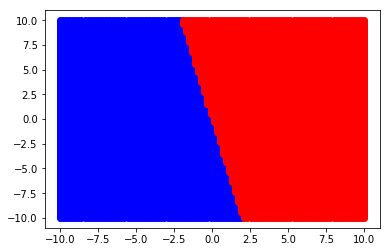

In [201]:
# Area de desición
ut.plot_area_AND(W,b)

In [202]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return(y)

def dsigmoid(x):
    dsig = sigmoid(x)*(1 - sigmoid(x))
    return(dsig)

def train_AND(X,Y,W,b,lr=0.01,verbose=False):
    # W has Shape [2,1]
    # b has Shape [1,1]
    
    # Feed-Forward
    s_pre = np.dot(X,W)
    s = s_pre + b
    y_pred = sigmoid(s)
    
    # Loss
    losses = (Y-y_pred)**2
    loss = np.sum(losses)/Y.shape[0]
    
    # Back-Propagation
    dL = np.ones_like(y_pred) #(-2/Y.shape[0])*np.sum(Y-y_pred)
    dsigma = dsigmoid(y_pred) * dL
    
    db = np.sum(dsigma)/Y.shape[0]
    
    dW = np.dot(dsigma.T,X)/Y.shape[0]
    
    
    new_W = W + lr*dW.T
    new_b = b + lr*db
    
    if verbose:
        print('Y:\n{}'.format(Y))
        print('\ny_pred:\n{}'.format(y_pred))
        print('\nLosses:\n{}'.format(losses))
        print('\nLoss:\n{}'.format(loss))
        print('\ndsigma:\n{}'.format(dsigma))
        print('\ndb:\n{}'.format(db))
        print('\ndW:\n{}'.format(dW))
    
    return(new_W,new_b)

In [203]:
#print(W)
#print(b)
print(X)
print(Y)

tmp_W = W
tmp_b = b
print('\ntmp_W:\n{}'.format(tmp_W))
print('\ntmp_b:\b{}'.format(tmp_b))

[[1 1]
 [1 0]
 [0 1]
 [0 0]]
[[1]
 [0]
 [0]
 [0]]

tmp_W:
[[0.5]
 [0.1]]

tmp_b[[0]]


Y:
[[1]
 [0]
 [0]
 [0]]

y_pred:
[[1.]
 [1.]
 [1.]
 [1.]]

Losses:
[[0.]
 [1.]
 [1.]
 [1.]]

Loss:
0.75

dsigma:
[[0.19661193]
 [0.19661193]
 [0.19661193]
 [0.19661193]]

db:
0.19661193324148185

dW:
[[0.09830597 0.09830597]]

tmp_W:
[[24.14893425]
 [23.75940146]]

tmp_b[[47.35525342]]


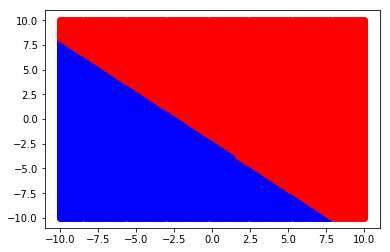

In [211]:
for i in range(1):
    tmp_W,tmp_b = train_AND(X,Y,tmp_W,tmp_b,lr=0.01,verbose=True)

print('\ntmp_W:\n{}'.format(tmp_W))
print('\ntmp_b:\b{}'.format(tmp_b))

# Area de desición
ut.plot_area_AND(tmp_W,tmp_b)